

# **GroupName: 11**

**Hom Bahadur Adhikari**

**Raj Lamichhane**

**Puran Karki**

**Nutan KC**

**Bishnu Chaudhary**

We are performing analysis on Video Game sales data, downloded from Kaggle.com
https://www.kaggle.com/datasets/gregorut/videogamesales


## Symbol and it's meaning

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

###Import all necesssary library in order to perform various tasks on the given csv dataset.(Puran)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

sns.set_style('whitegrid')

### Fetching the file from the github!


In [ ]:
# assigning the github link to the url.
url=

###Loading csv file for the processing.

In [ ]:
df=pd.read_csv(url)

## To know more about our dataset,we performed the following tasks


In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
df.shape

(16598, 11)

### Listing out the first 7 rows of the dataset to see the attributes.

In [ ]:
df.head(7)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


### Showing information about the dataset

In [ ]:
df.info(url)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Counting total number of data the in each column(Nutan)


In [ ]:
df.count() #count total number of data in each column.

,0
Rank,16598
Name,16598
Platform,16598
Year,16327
Genre,16598
Publisher,16540
NA_Sales,16598
EU_Sales,16598
JP_Sales,16598
Other_Sales,16598


All the column doesn't have equal number of  data


### Listing count of null cell in each columns

In [ ]:
missingvalue=df.isnull().sum()
print(missingvalue)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


## Finding out the percentage of the missing values.

In [ ]:
total_data=np.product(df.shape)
total_missing=missingvalue.sum()
missing_data_percentage=(total_missing/total_data)*100
print(missing_data_percentage)

0.18019695691704368


###Cleaning data form invalid (NaN) entry.

In [ ]:
#We have very small percentage of the missing data, and huge dataset.
#Since year and publisher data cannot be replaced with mean value, we decided to remove them completely.
 #dropna() removes all the rows which content 'NaN' in their cell data.
df =df.dropna()
df.count()

,0
Rank,16291
Name,16291
Platform,16291
Year,16291
Genre,16291
Publisher,16291
NA_Sales,16291
EU_Sales,16291
JP_Sales,16291
Other_Sales,16291


## Identifying the duplicate value and removes duplicate rows based on all columns .(Raj)

In [ ]:
print('Duplicate Data:', df.duplicated().sum(),'\n')
# There is no duplicate value.

Duplicate Data: 0 



###Removing irrelevent columns
*Although Rank in not irrelevent data.

##Displaying dataset after removing irrelevent columns.

In [ ]:
dropcolumn = ['Rank']
df = df.drop(columns=dropcolumn, axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### This state is for the checking outlier although we do not have it. But for the practice purpose we insert outlier by ourself.

In [ ]:
df.loc[[2],['JP_Sales']]=10000 # Our data is clear but inserting unexpected data in the coulumn of JP_sales to work with outlier
highest_Sales=df['Global_Sales'].max()
Lowest_Sales=df['Global_Sales'].min()
print(highest_Sales)
print(Lowest_Sales)

#We can see on the first head of the data global sales is 82.74 but the japan sales is 10000.
#It can not be that much so we decided to delete data which has vlaue more than 82.75 or more
cols_to_check = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df = df[(df[cols_to_check] <= 82.75).all(axis=1)]

df.head(7)



82.74
0.01


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


###Converting Year data to int64, and showing them in list.

In [ ]:
df['Year'] = df['Year'].apply(np.int64)
df1=df['Year'].unique()
df1.sort()
df1

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

## Using our dataset and print colums name that represent  nominal attributes(keshav)

In [ ]:
# check if there any nominal attributes or non
nominal_attribute=df.select_dtypes(include='object').columns.tolist()

#print the list of nominal attributes

print(nominal_attribute)

['Name', 'Platform', 'Genre', 'Publisher']


## Finding if there any attributes that contain binary value  (boolean)

In [ ]:
Binary_attributes= df.select_dtypes(include='bool').columns.tolist()

# printing the boolean column if it is existed in our dataset

print(Binary_attributes)
# There is not binary attributes

[]


## To find out the ordinal attributes

In [ ]:
"""
Both nominal and ordinal attributes are categorical data types. We can find the
ordinal attributes by using the same method of nominal attributes

"""

ordinal_attributes = df.select_dtypes(include='object').columns.tolist()
print(ordinal_attributes)

['Name', 'Platform', 'Genre', 'Publisher']


## Finding out how much sales had been done from 1980 to 2020.

In [ ]:


# List of columns to be deleted
columns_to_delete = ['Name', 'Genre', 'Publisher']

# Drop the specified columns and store them in df1
df1 = df.drop(columns=columns_to_delete)

# Sorting and finding out the min and max year to create a continuous series
df1 = df1.sort_values(by='Year', ascending=True)
smallest_year = df1['Year'].min()
latest_year = df1['Year'].max()
print(f"Smallest Year: {smallest_year}")
print(f"Latest Year: {latest_year}")

# Creating a Year-to-Year category column
df1['Year-to-Year'] = pd.cut(df1['Year'], bins=np.arange(1980, 2025, 5), right=False)

# Group by 'Year-to-Year' and calculate total sales for each group
total_sales = (
    df1.groupby(['Year-to-Year'])[['JP_Sales', 'Other_Sales', 'NA_Sales', 'EU_Sales', 'Global_Sales']]
    .sum()
    .reset_index()
)

# Display the first 8 rows of the total_sales DataFrame
print(total_sales.head(8))


Smallest Year: 1980
Latest Year: 2020
   Year-to-Year  JP_Sales  Other_Sales  NA_Sales  EU_Sales  Global_Sales
0  [1980, 1985)     22.37         1.59    111.95      7.18        143.16
1  [1985, 1990)     80.12         5.54    123.71     24.02        233.42
2  [1990, 1995)    117.89         6.88    115.36     42.82        282.93
3  [1995, 2000)    254.44        40.54    460.75    240.05        995.98
4  [2000, 2005)    200.24       134.91    897.05    467.11       1700.41
5  [2005, 2010)    306.66       326.41   1490.32    774.09       2899.85
6  [2010, 2015)    251.32       231.95    986.91    714.07       2184.72
7  [2015, 2020)     47.44        37.76    125.48    124.47        335.39


<ipython-input-20-6d5ed647cb14>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(['Year-to-Year'])[['JP_Sales', 'Other_Sales', 'NA_Sales', 'EU_Sales', 'Global_Sales']]


## Using sliceing technique

In [ ]:
df6 = df[['Name', 'Platform','Year']]
few_data = df6[26:32]
few_data

,Name,Platform,Year
27,Brain Age 2: More Training in Minutes a Day,DS,2005
28,Gran Turismo 3: A-Spec,PS2,2001
29,Call of Duty: Modern Warfare 3,X360,2011
30,Pokémon Yellow: Special Pikachu Edition,GB,1998
31,Call of Duty: Black Ops,X360,2010
32,Pokemon X/Pokemon Y,3DS,2013


## Doing statics by using the numpy

In [ ]:
columns_to_find_mean=['JP_Sales','Other_Sales','NA_Sales','EU_Sales','Global_Sales']
# Calculate mean and median for each column
for column in columns_to_find_mean:
    mean_value = np.mean(total_sales[column])
    median_value = np.median(total_sales[column])
    print(f"{column}.        -        Mean: {mean_value},        Median: {median_value}")

JP_Sales.        -        Mean: 160.06,        Median: 159.065
Other_Sales.        -        Mean: 98.19749999999999,        Median: 39.15
NA_Sales.        -        Mean: 538.94125,        Median: 293.115
EU_Sales.        -        Mean: 299.22625000000005,        Median: 182.26
Global_Sales.        -        Mean: 1096.9825,        Median: 665.685


This mean value indicate that average sales of Video game in every 5 years for 40 year. And the Median shows the sale of median value between 1980-2020 which is from 1995-2000 to 2000-2005 average sale.

##Finding standard deviation for country and region with high sales(puran)

In [ ]:
columns_to_find_std=['JP_Sales','Other_Sales','NA_Sales','EU_Sales','Global_Sales']
# Calculate mean and median for each column
for column in columns_to_find_std:
    standard_deviation = np.std(total_sales[column])
    print(f"{column}.        -        Standard Deviation:     {standard_deviation}")

JP_Sales.        -        Standard Deviation:     100.09525300932108
Other_Sales.        -        Standard Deviation:     114.32020269291863
NA_Sales.        -        Standard Deviation:     493.11041797039485
EU_Sales.        -        Standard Deviation:     292.9571436634333
Global_Sales.        -        Standard Deviation:     981.4563481091506


We have a really high standard deviation. In our Videogame context there is huge variantion in data. Our data is clear and it doesn't contain any outlier.The high std deviation is because of the huge demade in year 1995-2015. To get clear vision here we presented the line chart.

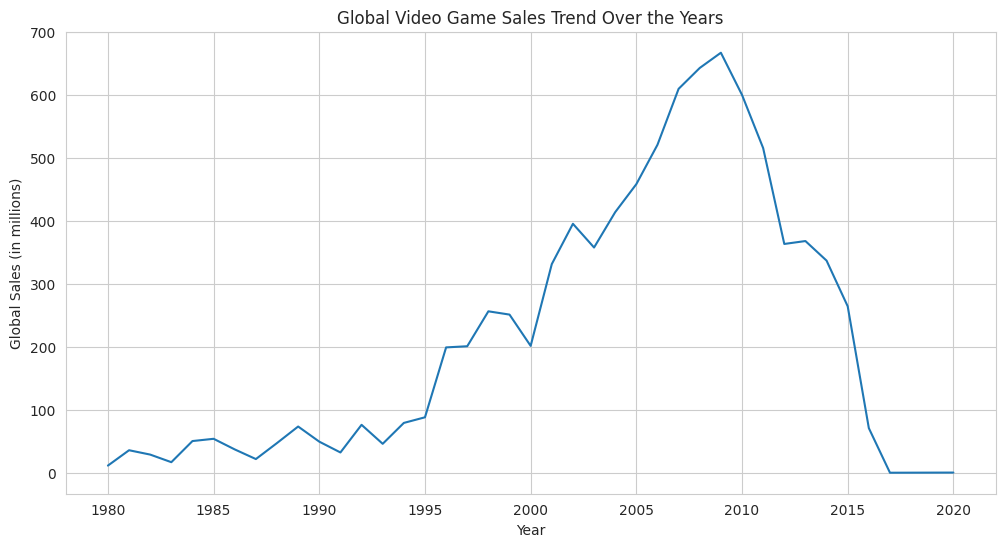

In [ ]:
# Grouping the data by year and summing up the global sales
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# Plotting the sales trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Global Video Game Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()

**Finding out the minimum and maximmum**(keshav)


Here, Maximum Videogame sales  and Minimum Videogame sales in every 5 year from 1980 to 2020 in different region of the world and overall sale of the world.

In [ ]:

# Assuming df1 has already been created and includes the 'Year-to-Year' column

# Grouping by 'Year-to-Year' and finding max and min for each region and global sales
sales_summary = (
    df1.groupby('Year-to-Year')[['JP_Sales', 'Other_Sales', 'NA_Sales', 'EU_Sales', 'Global_Sales']]
    .agg(['max', 'min'])
    .reset_index()
)

# Rename columns for better readability
sales_summary.columns = ['Year-to-Year',
                         'JP_Max', 'JP_Min',
                         'Other_Max', 'Other_Min',
                         'NA_Max', 'NA_Min',
                         'EU_Max', 'EU_Min',
                         'Global_Max', 'Global_Min']

# Display the sales summary
print(sales_summary)


   Year-to-Year  JP_Max  JP_Min  Other_Max  Other_Min  NA_Max  NA_Min  EU_Max  \
0  [1980, 1985)    2.46     0.0       0.47        0.0   26.93     0.0    0.63   
1  [1985, 1990)    6.81     0.0       1.51        0.0   29.08     0.0    3.58   
2  [1990, 1995)    3.81     0.0       0.55        0.0   12.78     0.0    3.75   
3  [1995, 2000)   10.22     0.0       1.00        0.0   11.27     0.0    8.89   
4  [2000, 2005)    5.38     0.0      10.57        0.0    9.43     0.0    6.21   
5  [2005, 2010)    6.50     0.0       8.46        0.0   41.49     0.0   29.02   
6  [2010, 2015)    5.65     0.0       4.14        0.0   14.97     0.0    9.27   
7  [2015, 2020)    2.78     0.0       2.31        0.0    5.77     0.0    6.06   

   EU_Min  Global_Max  Global_Min  
0     0.0       28.31        0.13  
1     0.0       40.24        0.02  
2     0.0       20.61        0.01  
3     0.0       31.37        0.01  
4     0.0       20.81        0.01  
5     0.0       82.74        0.01  
6     0.0       21

<ipython-input-25-76c1ca9f03e4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('Year-to-Year')[['JP_Sales', 'Other_Sales', 'NA_Sales', 'EU_Sales', 'Global_Sales']]


### Visualization of the data.

##Line Chart(Nutan)

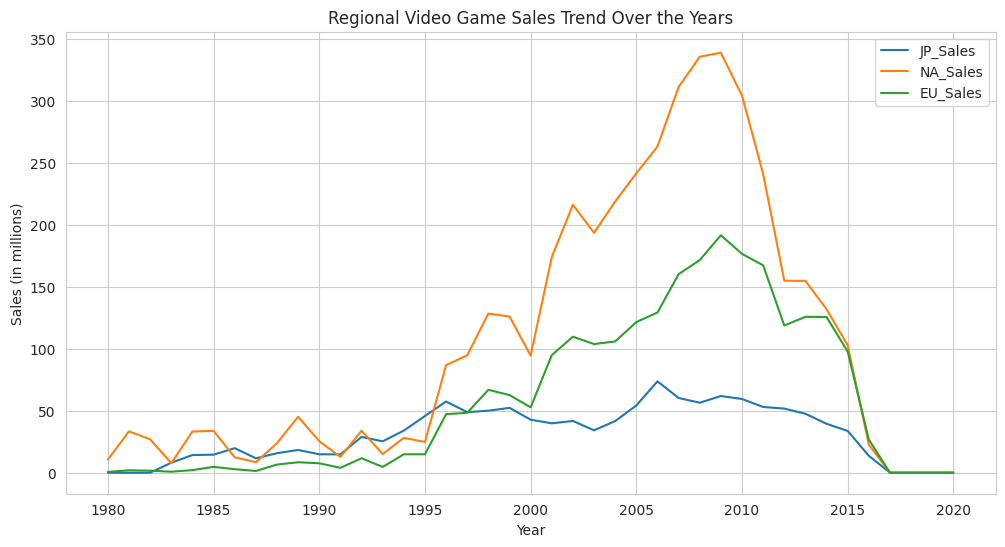

In [ ]:
yearly_sales = df.groupby('Year')[['JP_Sales', 'NA_Sales', 'EU_Sales']].sum()

# Plotting the sales trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x=yearly_sales.index, y='JP_Sales', label='JP_Sales')
sns.lineplot(data=yearly_sales, x=yearly_sales.index, y='NA_Sales', label='NA_Sales')
sns.lineplot(data=yearly_sales, x=yearly_sales.index, y='EU_Sales', label='EU_Sales')
plt.title('Regional Video Game Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.grid(True)
plt.legend()
plt.show()

Comparing Japan, North America and Europe sales over 40 years.

##Scatter Plot(Raj)

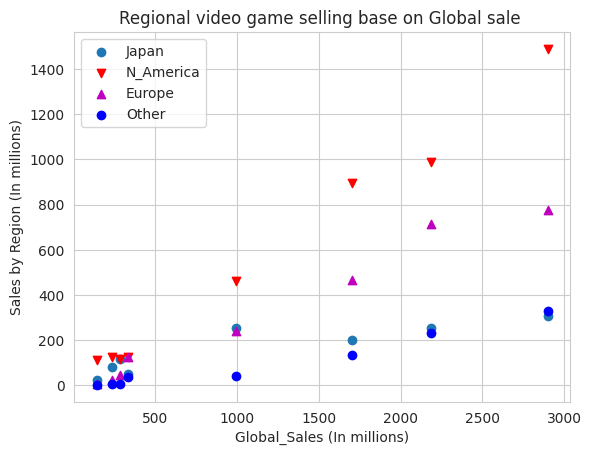

In [ ]:
x1 = total_sales['Global_Sales']
Japan = total_sales['JP_Sales']
NA = total_sales['NA_Sales']
Europe = total_sales['EU_Sales']
Other = total_sales['Other_Sales']



plt.scatter(x1, Japan, label='Japan')
plt.scatter(x1, NA, marker='v', color='r', label='N_America')
plt.scatter(x1, Europe, marker='^', color='m', label='Europe')
plt.scatter(x1,  Other, marker='o', color='b', label='Other')

plt.title('Regional video game selling base on Global sale ')
plt.xlabel('Global_Sales (In millions)')
plt.ylabel('Sales by Region (In millions)')
plt.legend()
plt.show()

By visualizing sales in each region separately, you gain insights into the performance and popularity of video games in specific regions and also to identify trends in each region over time all all these can be done using a bar chat and a Histogram.

I want to know the total sales of video games in each of the regions i am working on.

#Bar graph(Puran)

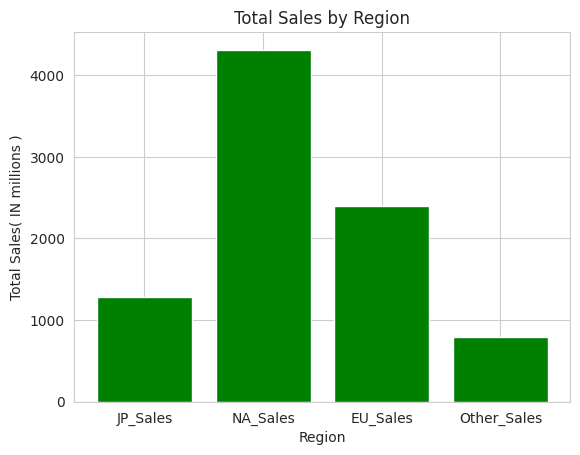

In [ ]:
x2 = ['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales']
y2 = df[x2].sum()  # Sum the specified columns

plt.bar(x2, y2, color='g')  # Provide both x and y values
plt.xlabel("Region")
plt.ylabel("Total Sales( IN millions )")
plt.title("Total Sales by Region")
plt.show()

##Histogram(Raj)

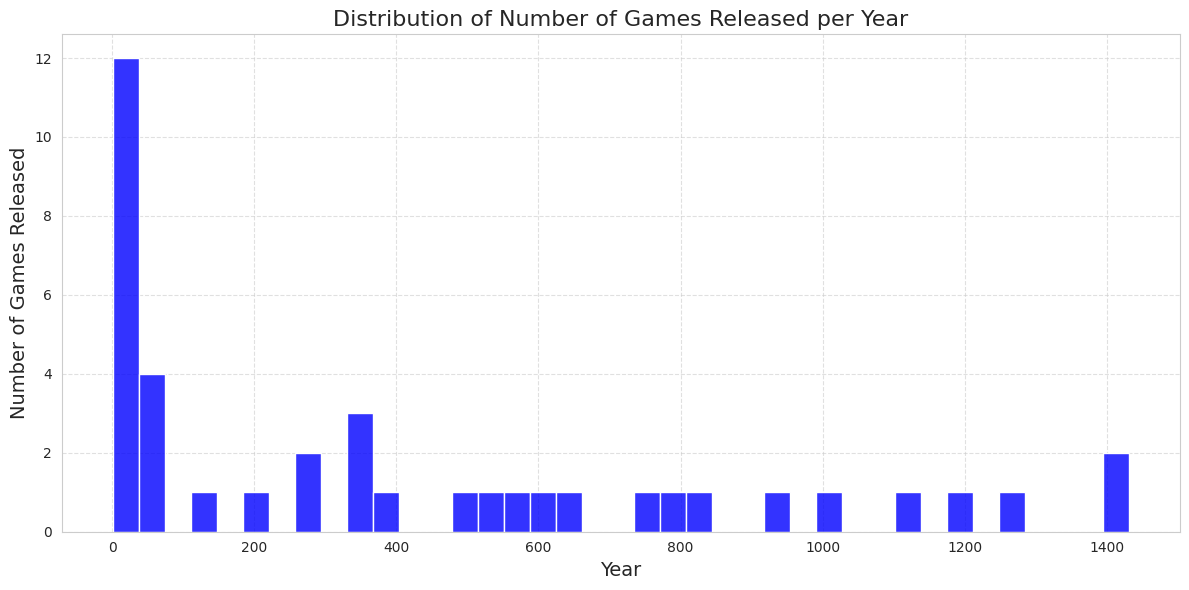

In [ ]:
# Grouping data by year and counting the number of games per year
games_per_year = df.groupby('Year').size()

# Creating the histogram
plt.figure(figsize=(12, 6))
sns.histplot(games_per_year, bins=len(games_per_year), kde=False, color='blue', alpha=0.8)

# Adding titles and labels
plt.title('Distribution of Number of Games Released per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Games Released', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##Pie Chart(keshav)

In [ ]:
ps2_platform = df[df["Platform"] == "PS2"]

ps2_platform_sales = ps2_platform.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

fig = px.pie(ps2_platform_sales, values = "Global_Sales", names = "Genre", title = "Genres in PS2")

fig.show()

##Heatmap